# Zipf analysis

### Eduardo G. Altmann, School of Mathematics and Statistics, Univ of Sydney
http://www.maths.usyd.edu.au/u/ega

### Complexity, Criticality and Computation (C3) Research Camp 2016
https://sydney.edu.au/complex-systems/events/c3camps/c3-2016.shtml

## Data

In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Load Data; Original data from Census. See also https://github.com/edugalt/scaling
cities_USA_V,cities_USA_L=json.load(open("data/cities_USA.json","r"))
cities_BRA_V,cities_BRA_L=json.load(open("data/cities_Brazil.json","r"))
#cities_OECD_V,cities_OECD_L=json.load(open("Cities/cities_OECD.json","r"))
cities_AUS_V,cities_AUS_L=json.load(open("data/cities_Australia.json","r"))

### Choose region 

In [3]:
V=cities_BRA_V
L=cities_AUS_L

In [4]:
listV=[cities_USA_V,cities_BRA_V,cities_AUS_V]
listRegions=["USA","BRA","AUS"]
symbol=["o-","p-","s-"]
colors=["red","green","blue"]

### Top 10 cities

In [5]:
for i in range(10):
    print(i+1,L[i],V[i])

1 Sydney 11316119
2 Melbourne 6355949
3 Brisbane 2693606
4 Perth 2609998
5 Adelaide 2476589
6 Gold Coast-Tweed Heads 2385640
7 Newcastle-Maitland 1832424
8 Canberra-Queanbeyan 1764541
9 Central Coast 1546516
10 Sunshine Coast 1413094


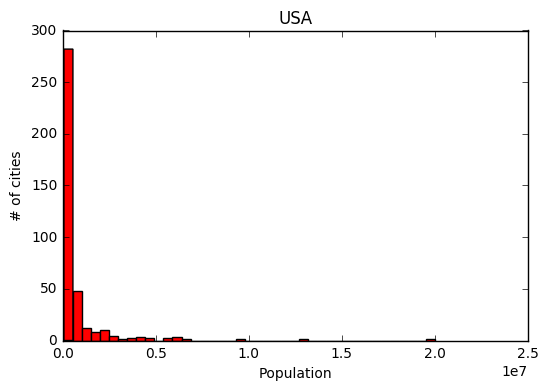

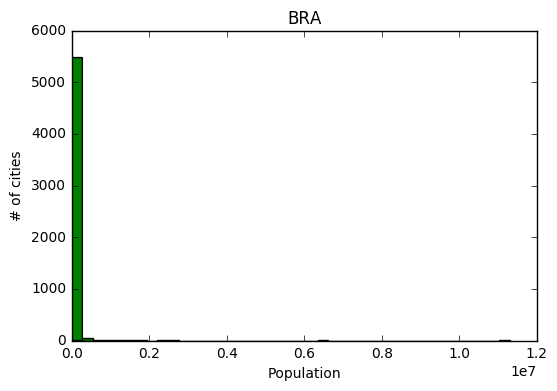

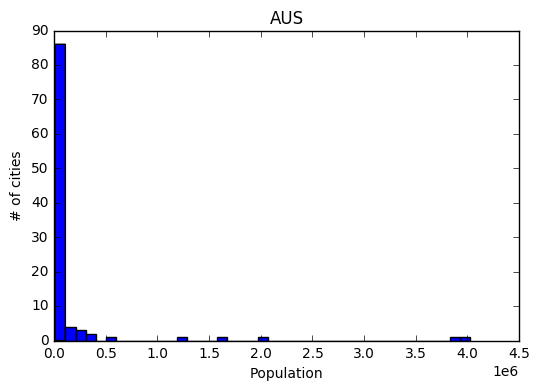

In [6]:
for i,V in enumerate(listV):
    plt.hist(V,bins=41,color=colors[i])
    plt.xlabel("Population")
    plt.ylabel("# of cities")
    plt.title(listRegions[i])
    plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
    plt.show()

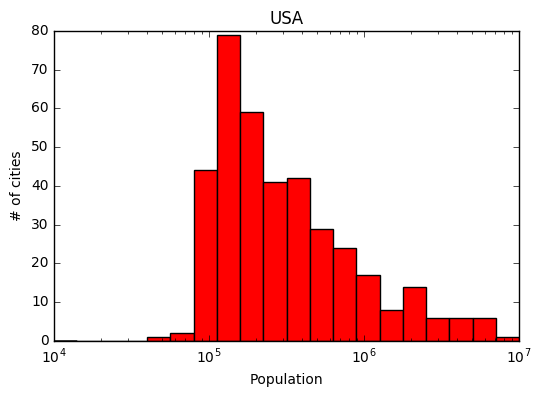

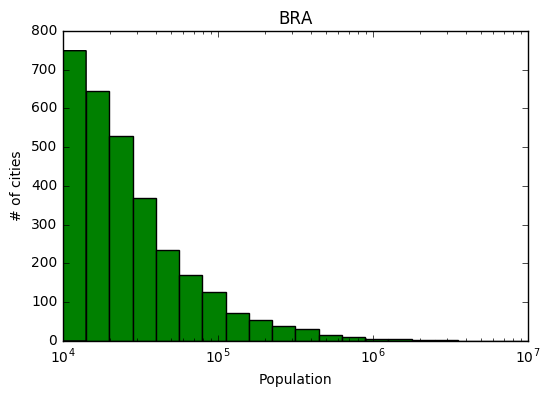

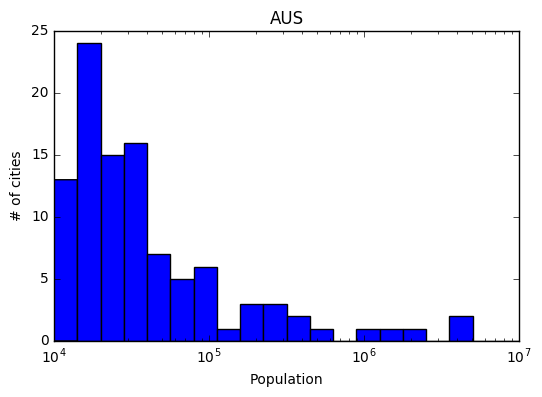

In [7]:
for i,V in enumerate(listV):
    plt.hist(V,bins=np.logspace(4,7,21),color=colors[i])
    plt.title(listRegions[i])
    plt.xscale("log")
    plt.xlabel("Population")
    plt.ylabel("# of cities")
    plt.show()

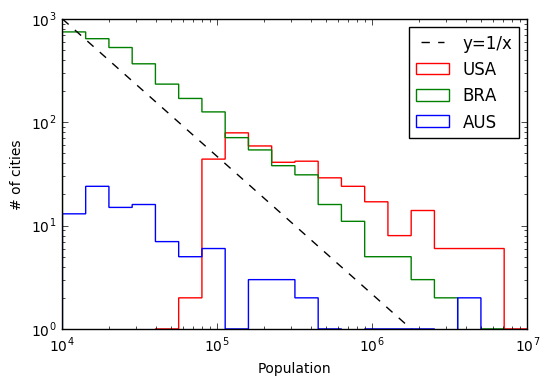

In [8]:
for i,V in enumerate(listV):
    plt.hist(V,bins=np.logspace(4,7,21),color=colors[i],label=listRegions[i],histtype="step")
plt.plot([10000,10000000],[1000,0.1],"--",color="black",label="y=1/x")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Population")
plt.ylabel("# of cities")
plt.ylim(1,1000)
plt.legend()
plt.show()

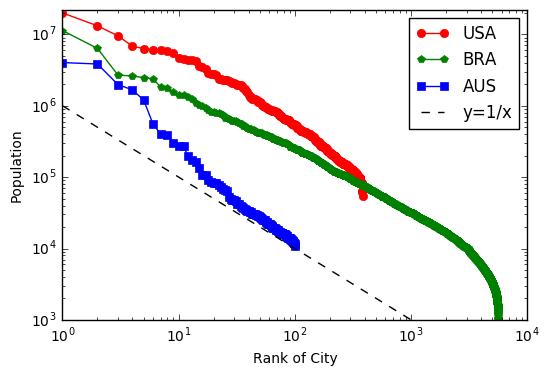

In [9]:
for i,V in enumerate(listV):
    plt.plot(range(len(V)+1)[1:],V,symbol[i],label=listRegions[i],color=colors[i],markeredgecolor=colors[i])
plt.plot(range(10000+1)[1:],1000000/np.array(range(10000+1)[1:]),"--",color="black",label="y=1/x")
plt.xscale('log')
plt.yscale('log')
plt.ylim(1000,22000000)
plt.ylabel("Population")
plt.xlabel("Rank of City")
plt.legend()
plt.show()

## Moments 

In [10]:
for i,V in enumerate(listV):
    print('%s:\t %d cities \t sigma/mu=%.2f' %(listRegions[i],len(V),np.std(V)/np.mean(V)))

USA:	 381 cities 	 sigma/mu=2.28
BRA:	 5565 cities 	 sigma/mu=5.91
AUS:	 101 cities 	 sigma/mu=3.35


### 20-80 rule

In [11]:
for i,V in enumerate(listV):
    print('%s \t:\t %.1f%% of cities have  %.1f%% of population (%.0f cities)' %(listRegions[i],100*int(len(V)*0.2)/float(len(V)),100.0*sum(V[:int(len(V)*0.2)])/sum(V),(len(V))))

USA 	:	 19.9% of cities have  72.4% of population (381 cities)
BRA 	:	 20.0% of cities have  76.3% of population (5565 cities)
AUS 	:	 19.8% of cities have  87.9% of population (101 cities)


# Networks 

Data from "The Koblenz Network Collection" http://konect.uni-koblenz.de/

In [13]:
networks_C_V,networks_C_L=json.load(open("data/networks_Citations.json","r"))
networks_Y_V,networks_Y_L=json.load(open("data/networks_Youtube.json","r"))

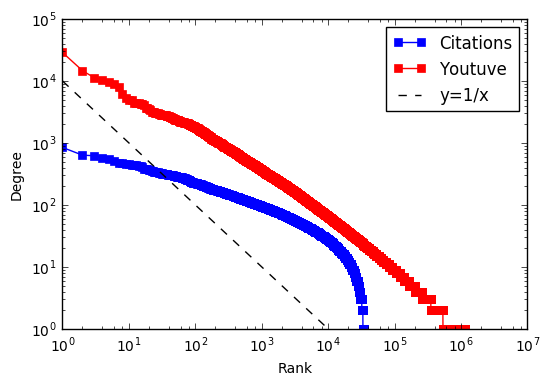

In [15]:
plt.plot(range(len(networks_C_V)+1)[1:],networks_C_V,symbol[i],label="Citations",color="blue",markeredgecolor="blue") 
plt.plot(range(len(networks_Y_V)+1)[1:],networks_Y_V,symbol[i],label="Youtuve",color="red",markeredgecolor="red")
plt.plot(range(10000+1)[1:],10000/np.array(range(10000+1)[1:]),"--",color="black",label="y=1/x") 
plt.xscale('log')
plt.yscale('log')

#plt.ylim(1000,22000000) 
plt.ylabel("Degree") 
plt.xlabel("Rank") 
plt.legend() 
plt.show()
